### Problem Statement : Titanic Survival Data Analysis

The Titanic disaster resulted in significant loss of life, with survival rates varying based on several factors.
This analysis aims to uncover the key factors that influenced survival on the Titanic, including demographic information, ticket class, and fare prices. By performing exploratory data analysis (EDA), we seek to understand patterns in survival rates and gain insights into passenger characteristics.

Dataset link: https://www.kaggle.com/datasets/ibrahimelsayed182/titanic-dataset?select=Titanic.csv 

### Objectives

1. Clean and preprocess the Titanic dataset, handling missing values,duplicate entries and categorical encoding.
2. Exploratory data analysis (EDA) to visualize distributions and relationships among features.
3. Investigate survival rates based on different factors such as passenger class, age, and place of embarkment.
4. Generate observations into patterns and potential biases that influenced survival during the disaster.
5. Categorize passengers by age groups, place of embarkment, who was alone or parch and visualize survival rates accordingly using different charts and tools.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
file_path = "Titanic.csv"
df = pd.read_csv(file_path)
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [3]:

# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


None

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


# Data Wrangling

In [4]:

def data_cleaning(df):
    """Function to clean and preprocess Titanic dataset."""
    # Handling missing values
    df['age'].fillna(df['age'].median(), inplace=True)
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
    
    # Convert categorical features
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})
    df['alone'] = df['alone'].astype(int)
    
    # Categorizing age into groups
    bins = [0, 12, 18, 35, 60, 100]
    labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Elder']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    
    return df

df = data_cleaning(df)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_21256\2148568857.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_21256\2148568857.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,age_group
0,0,22.0,1,0,7.2500,S,Third,man,0,0,Young Adult
1,1,38.0,1,0,71.2833,C,First,woman,0,1,Adult
2,1,26.0,0,0,7.9250,S,Third,woman,1,1,Young Adult
3,1,35.0,1,0,53.1000,S,First,woman,0,1,Young Adult
4,0,35.0,0,0,8.0500,S,Third,man,1,0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,S,Second,man,1,0,Young Adult
887,1,19.0,0,0,30.0000,S,First,woman,1,1,Young Adult
888,1,28.0,1,2,23.4500,S,Third,woman,0,0,Young Adult
889,0,26.0,0,0,30.0000,C,First,man,1,1,Young Adult


## Exploratory Data Analysis (EDA) based on Age group, Passenger Ticket Class/Fare, Gender and Place of Embarkment

C:\Users\hp\AppData\Local\Temp\ipykernel_21256\162561266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='coolwarm')


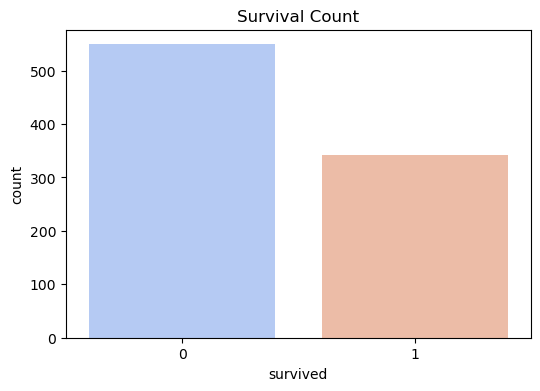

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df, palette='coolwarm')
plt.title("Total Survival Count from the Titanic Disaster")
plt.show()

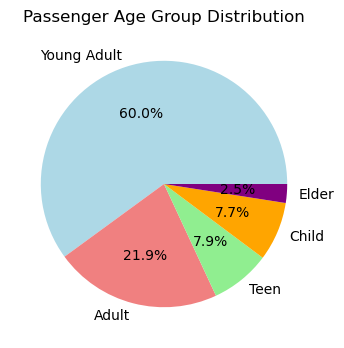

In [ ]:

plt.figure(figsize=(6, 4))
df['age_group'].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'lightcoral', 'lightgreen', 'orange', 'purple'])
plt.title("Distribution of Passengers in the Ship based on Age Group")
plt.ylabel('')
plt.show()


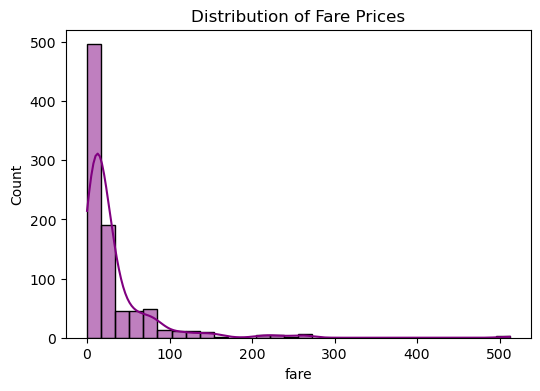

In [7]:

plt.figure(figsize=(6, 4))
sns.histplot(df['fare'], bins=30, kde=True, color='purple')
plt.title('Distribution of Fare Prices')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_21256\751108250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='survived', y='age', data=df, palette='coolwarm')


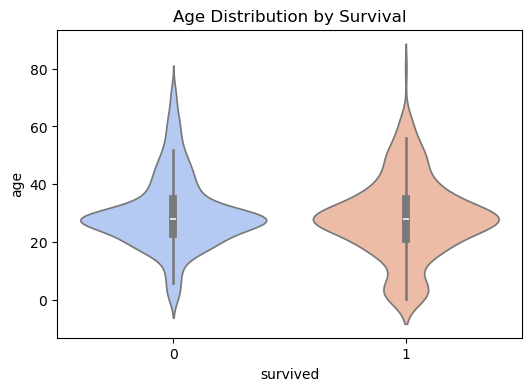

In [ ]:

plt.figure(figsize=(6, 4))
sns.violinplot(x='survived', y='age', data=df, palette='coolwarm')
plt.title("Passengers Survived based on Age group Distribution")
plt.show()


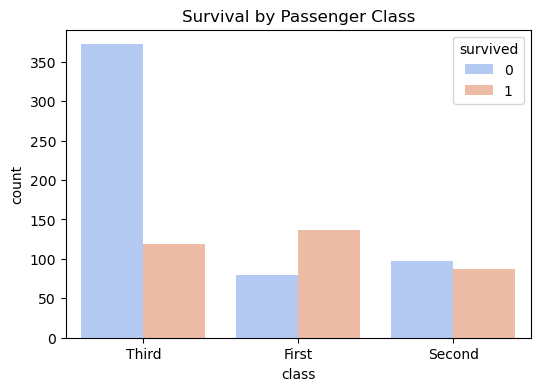

Data Analysis Completed Successfully!


In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='class', hue='survived', data=df, palette='coolwarm')
plt.title("Passengers Survived based on Passenger Class")
plt.show()

print("Data Analysis Completed Successfully!")
